In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

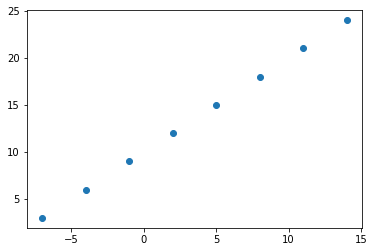

In [2]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


In [4]:
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(X,axis =-1), y, epochs = 100, verbose = 0)

In [5]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
model.predict([14.0])

array([[24.983334]], dtype=float32)

In [7]:
# Create a new model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)


c:\Users\avirupsaha\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
model.predict([14.0])

array([[23.022535]], dtype=float32)

In [10]:
# Building a bigger dataset
X = tf.range(-100, 100, 4)
y = X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

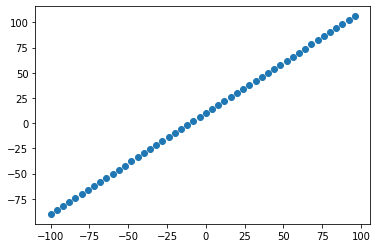

In [11]:
plt.scatter(X,y)

In [12]:
X_train = X[:40]
X_test = X[40:]
y_train = X[:40]
y_test = X[40:]

all_data_vars = [X_train,X_test,y_train,y_test]
for i in all_data_vars:
    print(f'{i}length is {len(i)}')

[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56]length is 40
[60 64 68 72 76 80 84 88 92 96]length is 10
[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56]length is 40
[60 64 68 72 76 80 84 88 92 96]length is 10


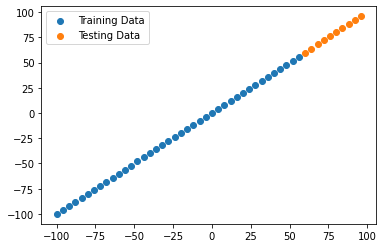

In [13]:

plt.scatter(X_train,y_train, cmap = 'red',label = "Training Data")
plt.scatter(X_test,y_test, cmap = 'green',label = "Testing Data")
plt.legend()

In [14]:
# Building a model for training data
# Create a new model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 41.7083 - mae: 41.7083
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 32.1202 - mae: 32.1202
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 22.9189 - mae: 22.9189
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 13.3381 - mae: 13.3381
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 3.7802 - mae: 3.7802
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 5.1060 - mae: 5.1060
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6995 - mae: 7.6995
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 6.1911 - mae: 6.1911
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 2.4711 - mae: 2.4711
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 2.0449 - mae: 2.0449
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss:

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1]),
    
])

model.compile(loss=tf.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

In [17]:
model.fit(X_train,y_train, verbose = 0, epochs = 100)

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from tensorflow.keras.utils import plot_model
plot_model(model = model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [20]:
y_pred = model.predict(X_test)

In [21]:
def plot_predictions(
                    train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = y_pred):
    plt.scatter(train_data, train_labels, c = 'b', label = "Training Data")
    plt.scatter(test_data, test_labels, c = 'g', label = 'Testing Data')
    plt.scatter(test_data,predictions, c = 'r', label = 'Predicted Data')
    plt.legend()

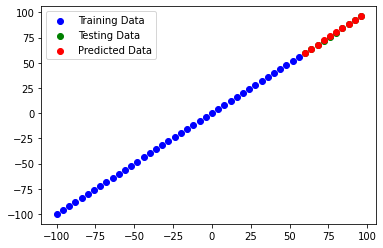

In [22]:
plot_predictions()

In [23]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.92828  , 14.7427845, 12.359573 , 10.7786455, 10.       ,
       10.023638 , 10.849561 , 12.477765 , 14.908252 , 18.141022 ],
      dtype=float32)>

In [24]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.115336224>

In [25]:
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([452.78067, 325.33902, 229.98889, 166.73013, 135.56273, 136.48672,
       169.50217, 234.60896, 331.80713, 461.09668], dtype=float32)>

In [26]:
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.01357125>

In [27]:
def get_metrics(y_true,y_pred):
    mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=tf.squeeze(y_pred))
    mse = tf.metrics.mean_squared_error(
        y_true=y_test, y_pred=tf.squeeze(y_pred))
   
    print(f'MAE for the model is {mae}')
    print(f'MSE for the model is {mse}')


In [28]:
get_metrics(y_test,y_pred)

MAE for the model is 0.11533622443675995
MSE for the model is 0.01357125025242567


In [29]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0)


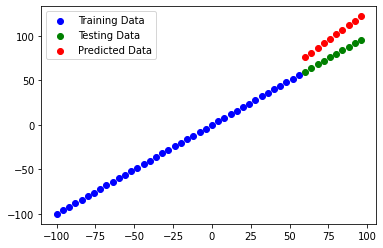

In [30]:
y_preds2 = model_2.predict(X_test)
plot_predictions(predictions= y_preds2)

In [31]:
# Calculate model 2 evaluation metrics
get_metrics(y_test, y_preds2)

MAE for the model is 21.26715087890625
MSE for the model is 462.17266845703125


Build model with 2 layers and 500 epochs

In [32]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs= 500, verbose = 0)

MAE for the model is 0.027523040771484375
MSE for the model is 0.0007730589131824672


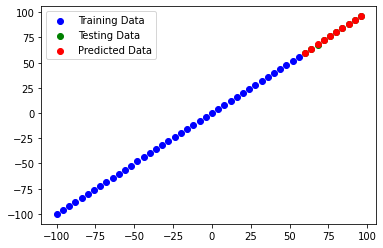

In [33]:
y_pred3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred3)
get_metrics(y_test, y_pred3)

Comparing the models

In [34]:
def metrics2(y_true,y_pred):
    mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=tf.squeeze(y_pred)).numpy()
    mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred)).numpy()
    return mae, mse 

In [35]:
metrics2(y_test, y_pred)[0]

0.115336224

In [36]:

model_results = [
    ['model' , metrics2(y_test, y_pred)[0], metrics2(y_test, y_pred)[1]],
    ['model2', metrics2(y_test, y_preds2)[0],metrics2(y_test, y_preds2)[1]],
    ['model3', metrics2(y_test, y_pred3)[0], metrics2(y_test, y_pred3)[1]]
]


In [37]:
all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse']) 

In [38]:
all_results

,model,mae,mse
0,model,0.115336,0.013571
1,model2,21.267151,462.172668
2,model3,0.027523,0.000773


In [39]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Saving the model

In [40]:
# Save model using SavedModel format
model_3.save("Saved Model 3")

INFO:tensorflow:Assets written to: Saved Model 3\assets


In [41]:
# Save model using HDF5 model format
model_3.save("Saved model 3.h5")

Loading the saved model

In [42]:
load_saved_model = tf.keras.models.load_model("Saved Model 3.h5")
load_saved_model

In [43]:
load_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Working with larger dataset

In [44]:
data_link = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(data_link)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [46]:
data = pd.get_dummies(data)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [47]:
X = data.drop('charges', axis = 1)
y = data['charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,test_size = 0.2)

 

In [48]:
split_data = [X_train, X_test,y_train, y_test]
for i in split_data:
    print(f'Lenght of {i.items()} is {len(i)}')

Lenght of <generator object DataFrame.items at 0x000002939AE9C510> is 1070
Lenght of <generator object DataFrame.items at 0x000002939AE9C040> is 268
Lenght of <zip object at 0x0000029397B95140> is 1070
Lenght of <zip object at 0x000002939AEA9380> is 268


In [51]:
# Build a model for this dataset

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                        metrics = ['mae'])


c:\Users\avirupsaha\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
insurance_model.fit(X_train, y_train,epochs=100)

In [54]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 0s/step - loss: 6862.7446 - mae: 6862.7446 - accuracy: 0.0000e+00


[6862.74462890625, 6862.74462890625, 0.0]

In [81]:
#Imporving the model
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                        metrics = ['mae'])

c:\Users\avirupsaha\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [82]:
history = insurance_model_2.fit(X_train, y_train, epochs=500,validation_split=0.33,batch_size=10, verbose = 0)


In [83]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 2311.6389 - mae: 2311.6389


[2311.638916015625, 2311.638916015625]

In [70]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [77]:
def plot_model_training(model):
    plt.plot(model.history['mae'])
    plt.plot(model.history['val_mae'])
    plt.title('model MAE')
    plt.ylabel('accuracy')
    plt.xlabel('mae')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

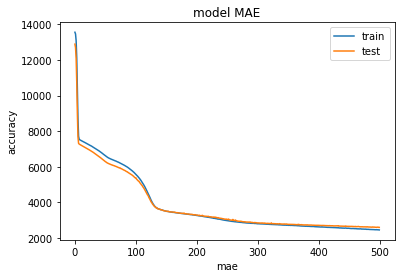

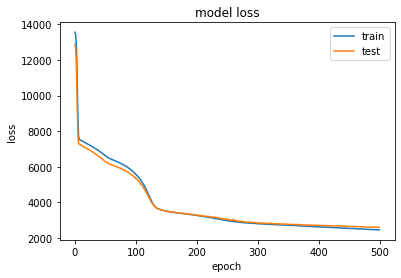

In [84]:
plot_model_training(history)

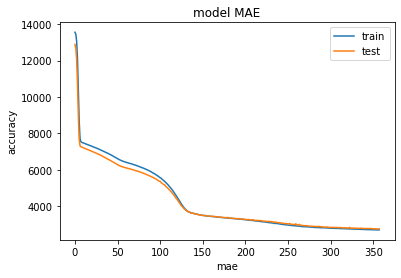

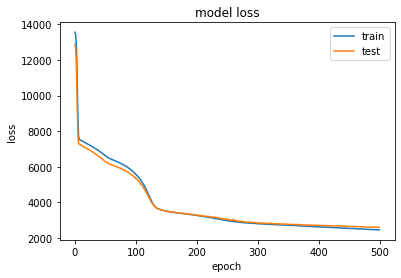

In [87]:
# Training the model with the early stopping callback function

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Callbacks are used when we want to stop the trainig when there is no imporvement on the loss function or any other metrics that is supplied to the monitor parameter
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                        metrics = ['mae'])

history2 = insurance_model_3.fit(X_train, y_train, epochs=1000,validation_split=0.33,batch_size=10, callbacks=[callback], verbose = 0)

plot_model_training(history2)


In [88]:
len(history.history['loss']) 
# Training stopped after 500 epochs

500

In [89]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2463.6567 - mae: 2463.6567


[2463.65673828125, 2463.65673828125]

Preprocessing -> Normalization and Standardization

In [91]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

data_link = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(data_link)

X = data.drop('charges', axis = 1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,test_size = 0.2)

ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)


In [92]:
# Fit the column transformer in our training data 
ct.fit(X_train) 

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [94]:
#Normalization of training and testing data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

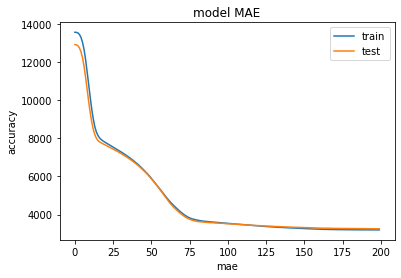

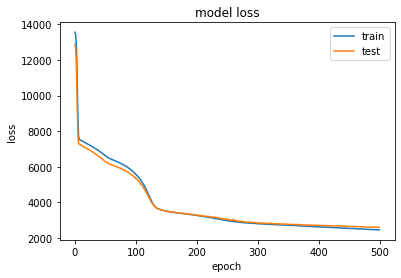

9/9 [==============================] - 0s 1ms/step - loss: 2871.6687 - mae: 2871.6687


[2871.668701171875, 2871.668701171875]

In [95]:
# Building a model on normalized data
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                        metrics = ['mae'])

history3 = insurance_model_4.fit(X_train_normal, y_train, epochs=1000,validation_split=0.33,batch_size=10, callbacks=[callback], verbose = 0)

plot_model_training(history3)

insurance_model_4.evaluate(X_test_normal, y_test)